# Credit Card Customer Segmentation


## Background: 

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


## Problem Statement

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

<b>Attribute information</b>

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

#### Analsysis Conducted by : Silambarasan Subramanian
https://github.com/ssilambarasan/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
c=pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
c.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
c.shape

(660, 7)

In [5]:
cust=c.drop(columns=['Sl_No','Customer Key'])

Dropped the Sl_No & Customer Key columns as they dont add any value to this analysis functionally

In [6]:
cust.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [7]:
cust.isna().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


In [9]:
cust.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


In [10]:
cust.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

In [11]:
features=cust.columns

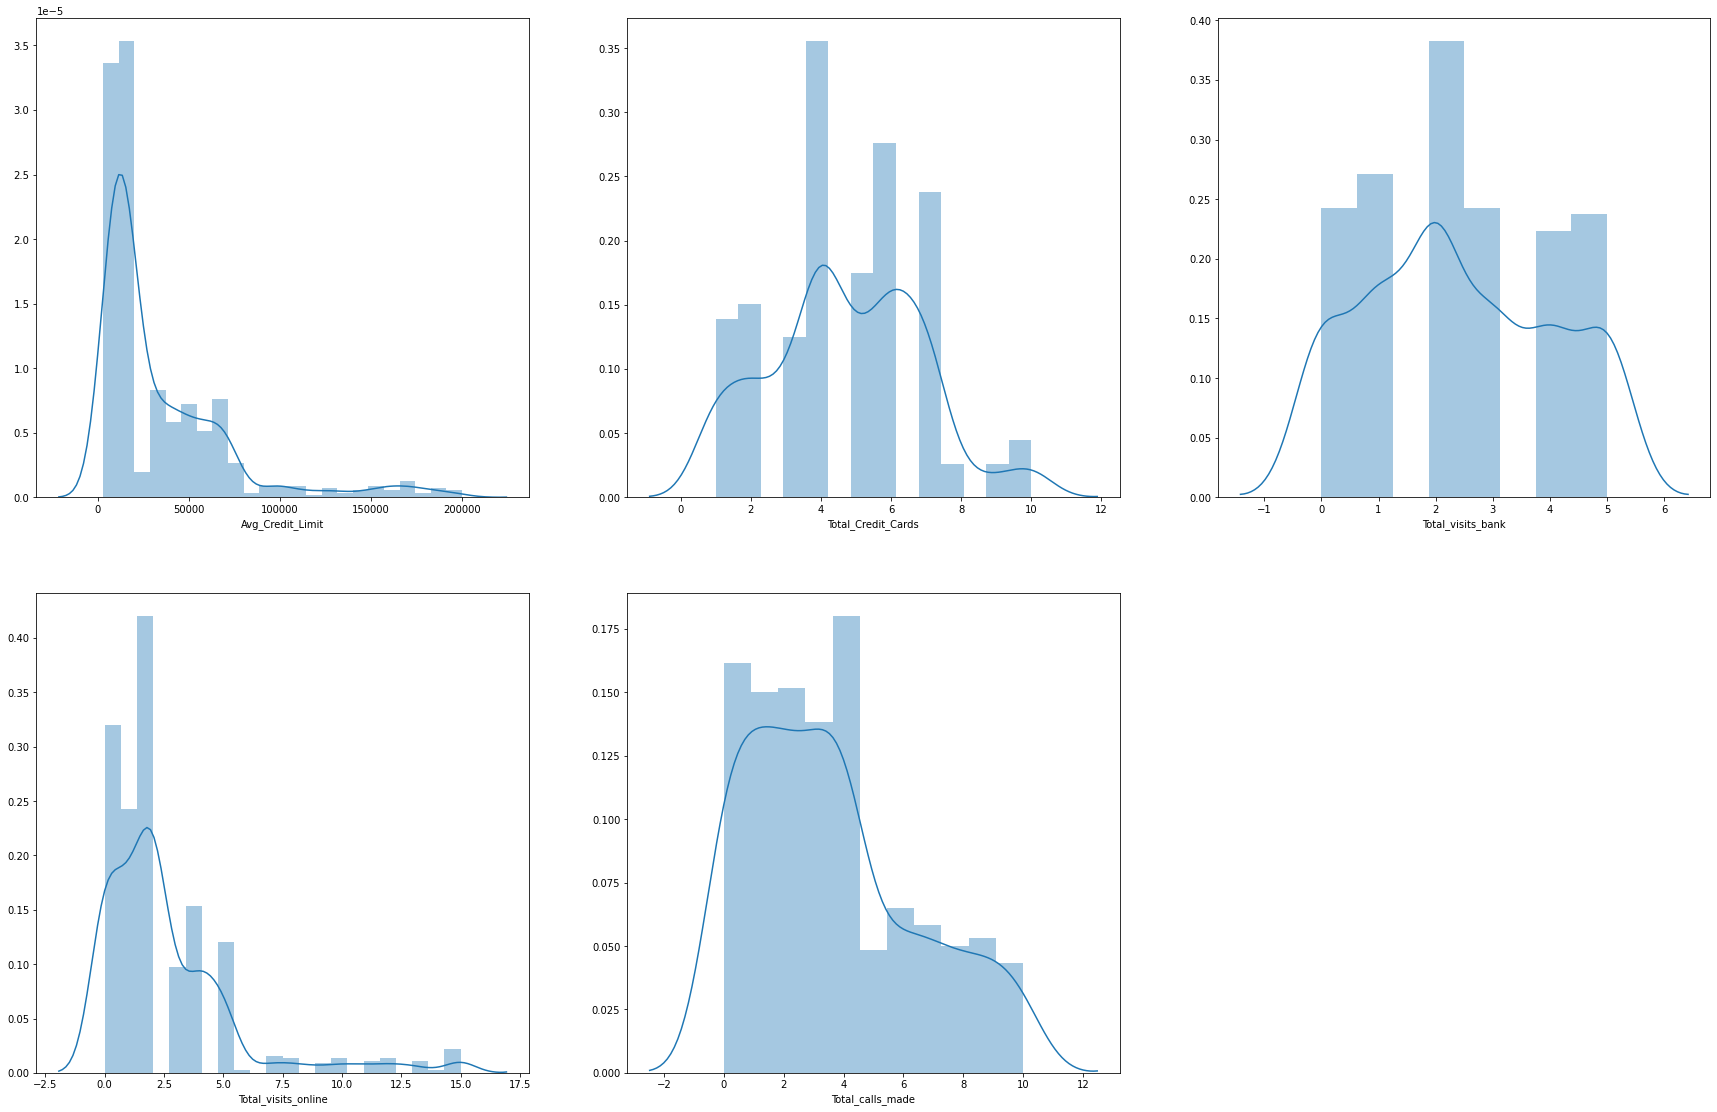

In [12]:
plt.figure(figsize=(30,30))
pos=1

for i in features:
    plt.subplot(3,3,pos)
    sns.distplot(cust[i])
    pos+=1

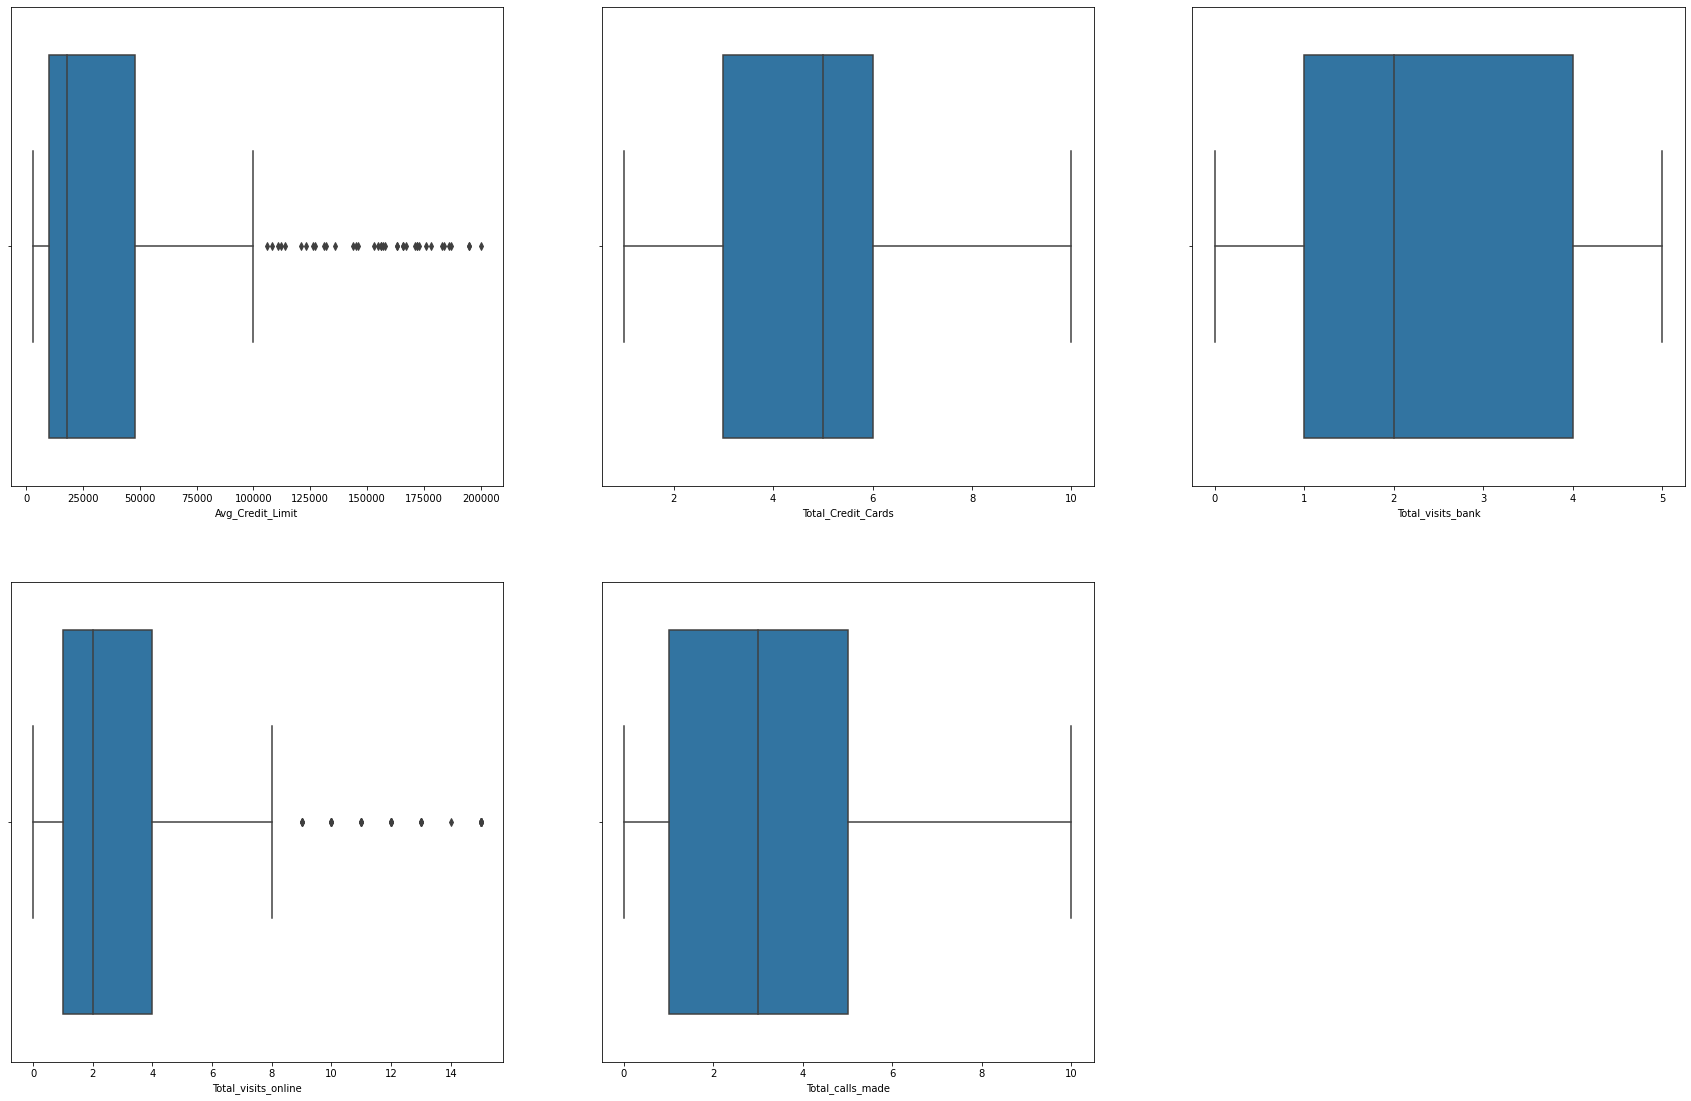

In [13]:
plt.figure(figsize=(30,30))
pos=1

for i in features:
    plt.subplot(3,3,pos)
    sns.boxplot(cust[i])
    pos+=1

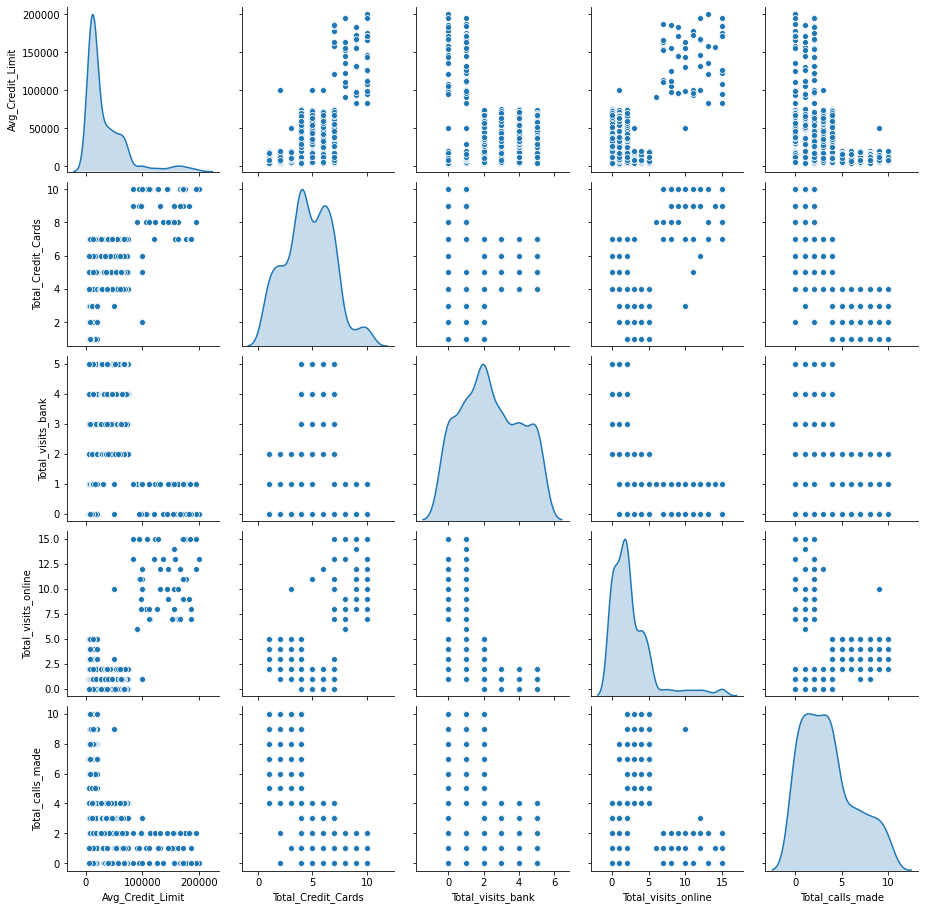

In [14]:
sns.pairplot(cust,diag_kind='kde')

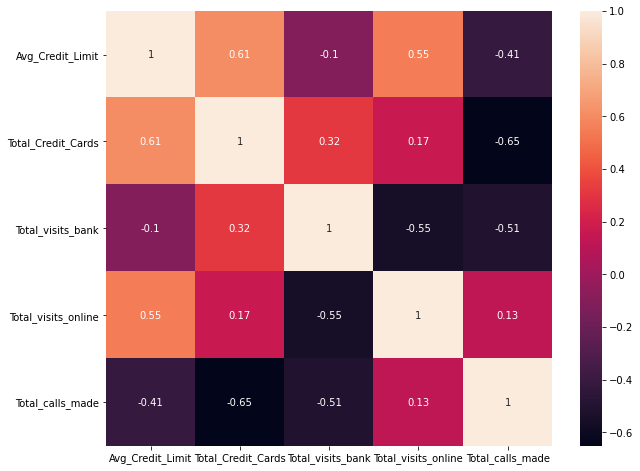

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(cust.corr(),annot=True)
plt.show()

- There can be 4 or 5 clusters based on the vizualizations
- No null values available in the data set
- Data is postiviely skewed for Avg_Credit_Limit & Total_visits_online columns
- No significant relationship exists

### Data Preparation - Scaling the data 

In [16]:
kmcust=cust

from scipy.stats import zscore
custz=cust.apply(zscore)

In [17]:
custz.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


### K-means Clustering

Text(0.5, 1.0, 'Selecting the k with elbow method')

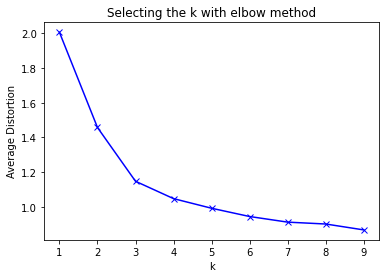

In [18]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(custz)
    prediction=model.predict(custz)
    meanDistortions.append(sum(np.min(cdist(custz, model.cluster_centers_, 'euclidean'), axis=1)) / custz.shape[0])
    
plt.plot(clusters,meanDistortions,'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting the k with elbow method')

In [19]:
final_model=KMeans(4)
final_model.fit(custz)
prediction=final_model.predict(custz)



#Append the prediction 
kmcust["GROUP"] = prediction
custz["GROUP"] = prediction
print("Groups Assigned : \n")
custz.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,3


In [20]:
cust_cluster=kmcust.groupby('GROUP')
cust_cluster.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,35904.522613,5.522613,2.477387,0.969849,2.075377
1,12167.420814,2.393665,0.927602,3.574661,6.923077
2,31226.315789,5.478947,4.515789,1.010526,1.936842
3,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

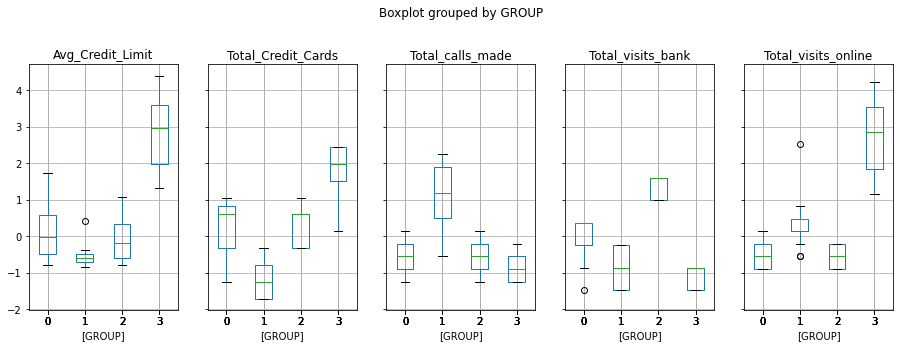

In [21]:
custz.boxplot(by='GROUP',layout=(2,5),figsize=(15,10))

In [22]:
custz['GROUP'].value_counts()

1    221
0    199
2    190
3     50
Name: GROUP, dtype: int64

### Silhouette Score for K-means clustering model

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(custz,prediction)
silhouette_avg

0.5137894865250595

#### KMeans Observation

- Group 0: Customers with higher credit limit, More credit cards, least banks visits, Most online visits & least calls made
- Group 1: Customers with medium credit limit, medium credit cards, most bank visits, less online visits & less calls made
- Group 2: Customers with least credit limit, least credit cards, less bank visits, more online visits & most calls made 
- Group 3: Customers with medium credit limit, medium credit cards, More bank visits, least online visits & more calls made


### Hierarchical clustering

In [24]:
agcust=cust

from scipy.stats import zscore
agcustz=agcust.apply(zscore)

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
model=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [27]:
model.fit(agcustz)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

In [28]:
agcustz['GROUP']=model.labels_
agcustz.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,0
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,0
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,0
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,0


In [29]:
agcust['GROUP']=model.labels_
agcust.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,2
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1
5,20000,3,0,1,8,0
6,100000,5,0,11,2,1
7,15000,3,0,1,1,0
8,5000,2,0,2,2,0
9,3000,4,0,1,7,0


In [30]:
agcust_clust=agcust.groupby(['GROUP'])
agcust_clust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,12180.180180,2.396396,0.923423,3.563063,6.896396
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,36010.101010,5.535354,2.489899,0.969697,2.080808
3,31226.315789,5.478947,4.515789,1.010526,1.936842


In [31]:
agcust.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,2
1,50000,3,0,10,9,0
2,50000,7,1,3,4,2
3,30000,5,1,1,4,2
4,100000,6,0,12,3,1


In [32]:
agcust['GROUP'].value_counts()

0    222
2    198
3    190
1     50
Name: GROUP, dtype: int64

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

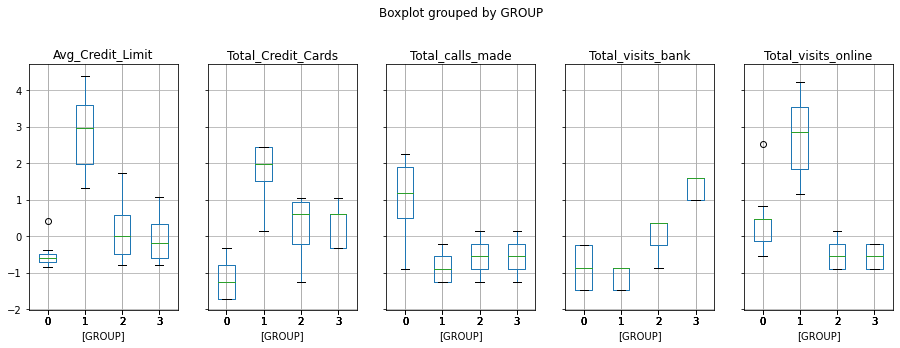

In [33]:
agcustz.boxplot(by='GROUP',layout=(2,5),figsize=(15,10))

#### Hierarical Clustering Observation

- Group 0: Customers with least credit limit, least credit cards, less bank visits, more online visits & most calls made
- Group 1: Customers with higher credit limit, most credit cards, least banks visits, Most online visits & least calls made
- Group 2: Customers with medium credit limit, medium credit cards, more bank visits, least online visits & more calls made
- Group 3: Customers with medium credit limit, medium credit cards, most bank visits, less online visits & more calls made


In [34]:
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage

In [35]:
from scipy.spatial.distance import pdist

#### cophenetic coefficient for average method

In [36]:
Z=linkage(agcustz,metric='euclidean',method='average')
c,coph_dists=cophenet(Z,pdist(agcustz))
c

0.9189907842776153

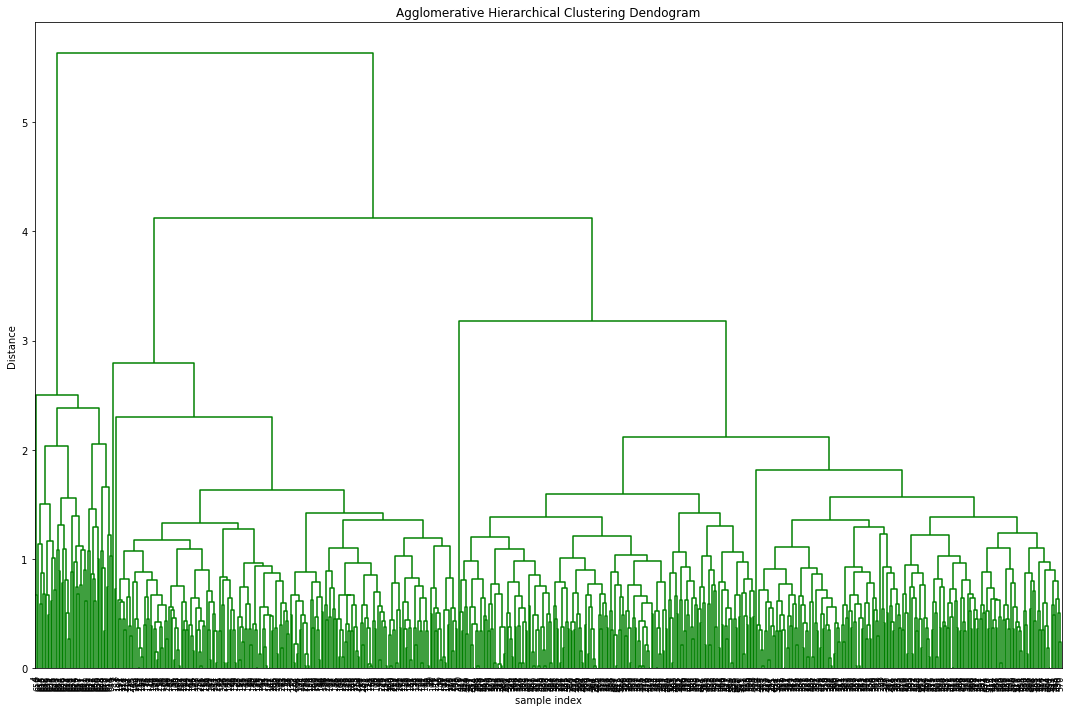

In [37]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### cophenetic coefficient for complete method

In [38]:
Z=linkage(agcustz,metric='euclidean',method='complete')
c,coph_dists=cophenet(Z,pdist(agcustz))
c

0.9150292005140291

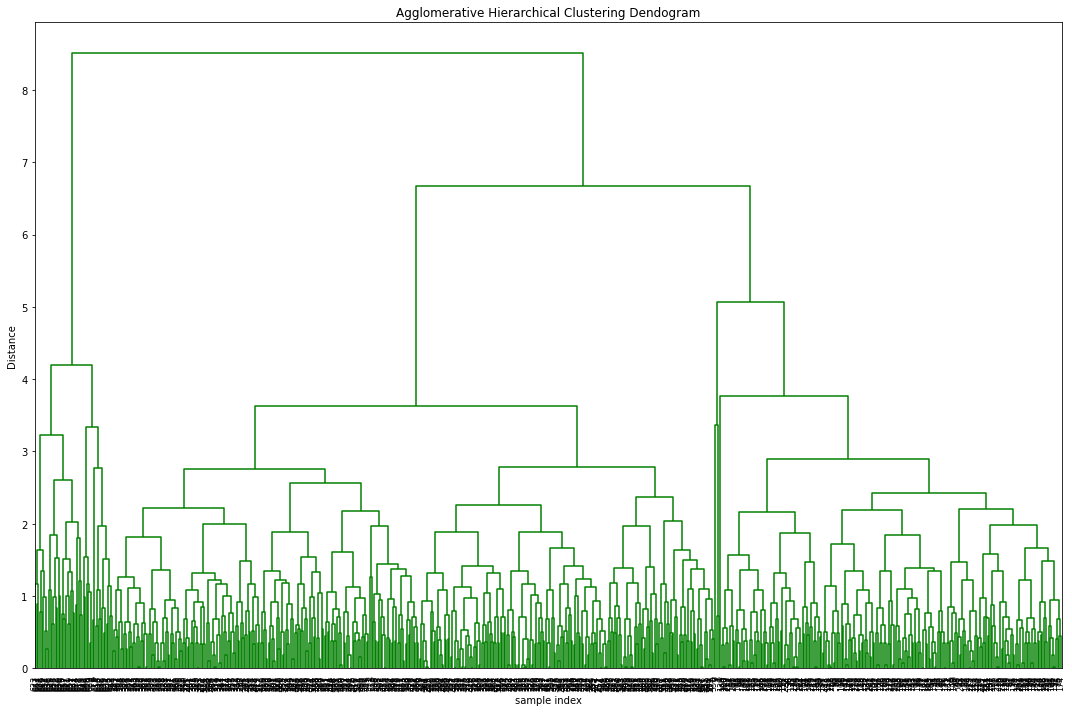

In [39]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

### Comparing K-means clusters with Hierarchical clusters

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

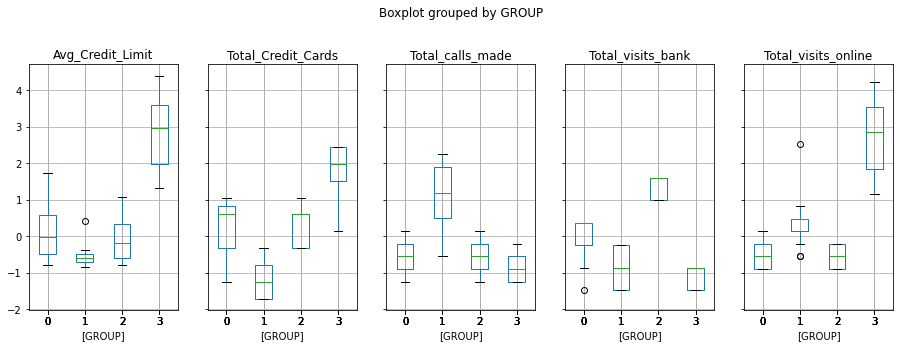

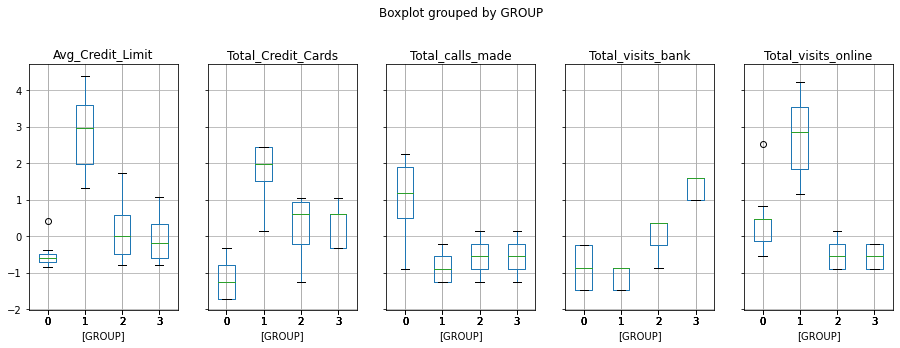

In [40]:
custz.boxplot(by='GROUP',layout=(2,5),figsize=(15,10))
agcustz.boxplot(by='GROUP',layout=(2,5),figsize=(15,10))

#### KMeans Observation

- Group 0: Customers with higher credit limit, More credit cards, least banks visits, Most online visits & least calls made
- Group 1: Customers with medium credit limit, medium credit cards, most bank visits, less online visits & less calls made
- Group 2: Customers with least credit limit, least credit cards, less bank visits, more online visits & most calls made 
- Group 3: Customers with medium credit limit, medium credit cards, More bank visits, least online visits & more calls made

#### Hierarical Clustering Observation

- Group 0: Customers with least credit limit, least credit cards, less bank visits, more online visits & most calls made
- Group 1: Customers with higher credit limit, most credit cards, least banks visits, Most online visits & least calls made
- Group 2: Customers with medium credit limit, medium credit cards, more bank visits, least online visits & more calls made
- Group 3: Customers with medium credit limit, medium credit cards, most bank visits, less online visits & more calls made
  

### Final Analysis / Answering Key Questions:

#### 1. How many different segments of customers are there?

There are 4 different segments of customers in this dataset

#### 2. How are these segments different from each other?

Credit limit & number of credit cards differentiates these segments. The other attributes contributes to the segments as well  

#### 3. What are your recommendations to the bank on how to better market to and service these customers?

- Customers with medium credit pay more visit to the banks & less online visit
- Target these customers, whoever visits the back with great deals for credit cards 
- Customers with medium credit also tend to make/attend more calls, a telephone campaign also will help  